# About the company

Bellabeat is a tech company specializing in health-focused smart products designed to empower women with insights into their well-being. They offer a range of smart devices that track activity, sleep, stress, and reproductive health, providing users with valuable data to understand and improve their health habits.

This case study focuses on analyzing fitness data from Bellabeat’s smart devices to identify potential growth opportunities for the company, with particular attention on one key product: the Bellabeat app.

The Bellabeat app provides users with data on their activity, sleep patterns, stress levels, menstrual cycle, and mindfulness practices. By connecting with Bellabeat’s wellness products, the app helps users gain insights into their daily routines, encouraging informed and health-conscious decisions.

# Ask Phase

## Questions for the analysis

    1. What are the current trends in smart device usage?
    2. How might these trends be relevant to Bellabeat customers?
    3. How could these insights inform Bellabeat's marketing strategy?

## Business task

Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy.

## Stakeholders

    1. Urška Sršen - Bellabeat cofounder and Chief Creative Officer
    2. Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
    3. Bellabeat Marketing Analytics team


  

# Prepare Phase

## Dataset used
The dataset used in this case study is FitBit Fitness Tracker Data, hosted on Kaggle and provided by Mobius.

## Dataset limitations
With a limited sample size of 30 users and the absence of demographic information, there's a potential for sampling bias, making it unclear whether this sample accurately represents the broader population. Additionally, the dataset is not up-to-date, and the survey's time constraints further limit its relevance.


# Process Phase

I’ll conduct my analysis in Python, given its accessibility, the volume of data, and its powerful data visualization capabilities, allowing me to effectively share results with stakeholders.

##  Opening libraries

We will choose the packages that will help us on our analysis and open them. We will use the following packages for our analysis:

    1. Pandas
    2. Numpy
    3. Matplotlib 
    4. Datetime
    5. Seaorn

In [619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## Importing datasets

Based on the available datasets, we will upload the ones most relevant to addressing our business objectives. Our analysis will focus on the following datasets:

    1. Daily Activity
    2. Daily Sleep
    3. Hourly Steps

In [23]:
# Load the CSV files
daily_activity = pd.read_csv('Daily_activity.csv')
daily_sleep = pd.read_csv('Daily_sleep.csv')
hourly_steps = pd.read_csv('Hourly_steps.csv')

## Preview our datasets

We will preview our selected data frames (first five rows) and check the summary of each column.

In [187]:
display(daily_activity.head(5))

daily_activity.info()

daily_activity.isnull().sum()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [52]:
display(daily_sleep.head(5))

daily_sleep.info()

daily_sleep.isnull().sum()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [56]:
display(hourly_steps.head(5))

hourly_steps.info()

hourly_steps.isnull().sum()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


Id              0
ActivityHour    0
StepTotal       0
dtype: int64

## Cleaning and formatting 

Now that we have a better understanding of our data structures, we will process them to identify any errors and inconsistencies.

### Veryfying number of users

Before proceeding with our data cleaning, we want to determine the number of unique users in each DataFrame.

In [149]:
display(daily_activity["Id"].nunique())

display(daily_sleep["Id"].nunique())

display(hourly_steps["Id"].nunique())

33

24

33

### Duplicates

We will now check for any duplicate entries.

In [113]:
total_duplicates_daily_activity = print(daily_activity.duplicated().sum())

0


In [153]:
total_duplicates_daily_sleep = print(daily_sleep.duplicated().sum())

0


In [117]:
total_duplicates_hourly_steps = print(hourly_steps.duplicated().sum())

0


### Remove duplicates and Missing values

Given that our dataset for daily sleep contains 3 duplicate rows, we can proceed to remove any duplicate entries.

In [159]:
daily_sleep = daily_sleep.drop_duplicates()

In [278]:
daily_sleep.head()

,Id,SleepDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


### Consistency of date and time columns.

We will focus on cleaning and converting the date-time format for the daily_activity and daily_sleep DataFrames, as we plan to merge both. Since we can disregard the time in the daily_sleep DataFrame, we will use as_date instead of as_datetime.

In [325]:
daily_sleep.rename(columns={'SleepDate': 'Date'}, inplace=True) # renaming the column sleepday to Date

daily_activity.rename(columns={'ActivityDate': 'Date'}, inplace=True)

In [319]:
daily_sleep.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [329]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])

In [268]:
 daily_activity.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [321]:
daily_sleep['Date'] = pd.to_datetime(daily_sleep['Date'])

In [270]:
 daily_sleep.dtypes

Id                             int64
SleepDate             datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

## Merging Datasets

We will merge the daily_activity and daily_sleep datasets using id and date as the primary keys to examine any correlations between the variables.

In [334]:
daily_activity_sleep = pd.merge(daily_activity, daily_sleep, on=['Id', 'Date'])

In [342]:
daily_activity_sleep.head(5)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


#  Analyze Phase and Share Phase 

The focus of this analysis will mainly be on the types of users on the app and the frequency of use of the app.

## User per activity level

We can use the available data to classify users by activity level based on their daily step count. We’ll categorize users into different activity levels as follows:
    1. Sedentary - Less than 5000 steps a day.    2. 
Lightly active - Between 5000 and 7499 steps a day.    3. 
Fairly active - Between 7500 and 9999 steps a day    4. .
Very active - More than 10000 steps a d

The classification follows the guidelines provided in https://www.10000steps.org.au/articles/counting-steps/.

First, we will calculate the average daily steps for each user.ay.

In [368]:
daily_average =  daily_activity_sleep.groupby('Id').agg(
    mean_daily_steps=('TotalSteps', 'mean'),
    mean_daily_calories=('Calories', 'mean'),
    mean_daily_sleep=('TotalMinutesAsleep', 'mean')
).reset_index()

In [370]:
daily_average.head()

,Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
0,1503960366,12405.680000,1872.280000,360.280000
1,1644430081,7967.750000,2977.750000,294.000000
2,1844505072,3477.000000,1676.333333,652.000000
3,1927972279,1490.000000,2316.200000,417.000000
4,2026352035,5618.678571,1540.785714,506.178571


We will now classify our users by the daily average steps.

In [376]:
daily_average['user_type'] = np.where(daily_average['mean_daily_steps'] < 5000, 'sedentary',
                             np.where((daily_average['mean_daily_steps'] >= 5000) & (daily_average['mean_daily_steps'] < 7500), 'lightly active',
                             np.where((daily_average['mean_daily_steps'] >= 7500) & (daily_average['mean_daily_steps'] < 10000), 'fairly active',
                                                        'very active')))

In [386]:
daily_average.head()

,Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,user_type
0,1503960366,12405.680000,1872.280000,360.280000,very active
1,1644430081,7967.750000,2977.750000,294.000000,fairly active
2,1844505072,3477.000000,1676.333333,652.000000,sedentary
3,1927972279,1490.000000,2316.200000,417.000000,sedentary
4,2026352035,5618.678571,1540.785714,506.178571,lightly active


In [388]:
# Step 1: Calculate the total count for each user type
user_type_percent = daily_average.groupby('user_type').size().reset_index(name='total')

# Step 2: Calculate the overall total and percentage for each user type
user_type_percent['totals'] = user_type_percent['total'].sum()
user_type_percent['total_percent'] = user_type_percent['total'] / user_type_percent['totals']

# Step 3: Format percentage as labels
user_type_percent['labels'] = (user_type_percent['total_percent'] * 100).round(2).astype(str) + '%'

# Step 4: Set the 'user_type' order
user_type_percent['user_type'] = pd.Categorical(user_type_percent['user_type'], 
                                                categories=["very active", "fairly active", "lightly active", "sedentary"],
                                                ordered=True)


In [390]:
user_type_percent.head()

,user_type,total,totals,total_percent,labels
0,fairly active,9,24,0.375000,37.5%
1,lightly active,5,24,0.208333,20.83%
2,sedentary,5,24,0.208333,20.83%
3,very active,5,24,0.208333,20.83%


The data shows a balanced distribution of users across various activity levels based on their daily step counts. This indicates that users with varying activity levels are engaging with smart devices, suggesting that individuals of all activity types use these devices regularly.

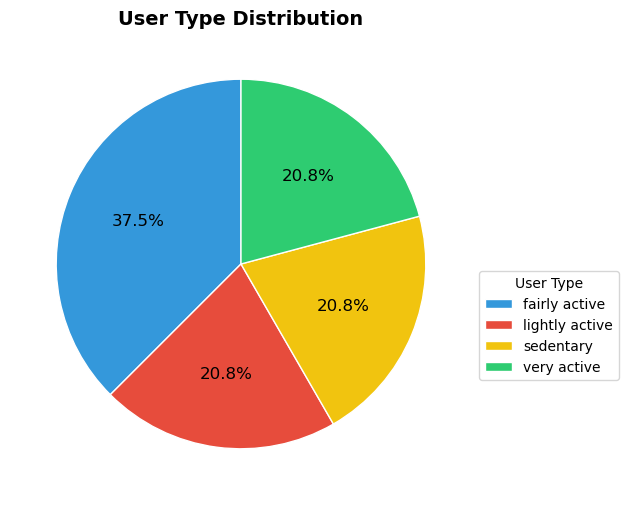

In [416]:
# Set colors
colors = ["#3498db", "#e74c3c", "#f1c40f", "#2ecc71"]

# Plot pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(user_type_percent['total_percent'], 
                                    colors=colors, 
                                    startangle=90, 
                                    wedgeprops={'edgecolor': 'w'},
                                    autopct='%1.1f%%')  # Show percentages inside slices

# Customize the appearance of the percentage labels
for text in autotexts:
    text.set_color('black')  # Set percentage label color to white
    text.set_fontsize(12)    # Set font size

# Add legend and title
plt.legend(user_type_percent['user_type'], title="User Type", bbox_to_anchor=(1, 0.5))
plt.title("User Type Distribution", fontsize=14, weight='bold')
plt.show()

## Steps per weekday

We aim to determine which days of the week users are most active and verify if they meet the recommended daily step count. To accomplish this, we will analyze the data based on the date column to identify the weekdays. Additionally, we will calculate the average number of steps walked for each weekday.

In [655]:
# Extract the weekday from the date and create a new column
daily_activity['weekday'] = daily_activity['Date'].dt.day_name()

# Define the order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert weekday to a categorical type with the specified order
daily_activity['weekday'] = pd.Categorical(daily_activity['weekday'], categories=weekday_order, ordered=True)

# Group by weekday and calculate the average daily steps
weekday_steps = daily_activity.groupby('weekday', observed=False)['TotalSteps'].mean().reset_index()

# Rename the column for clarity
weekday_steps.rename(columns={'totalsteps': 'daily_steps'}, inplace=True)

# Display the first few rows of the resulting DataFrame
weekday_steps.head(8)

,weekday,TotalSteps
0,Monday,7780.866667
1,Tuesday,8125.006579
2,Wednesday,7559.373333
3,Thursday,7405.836735
4,Friday,7448.230159
5,Saturday,8152.975806
6,Sunday,6933.231405


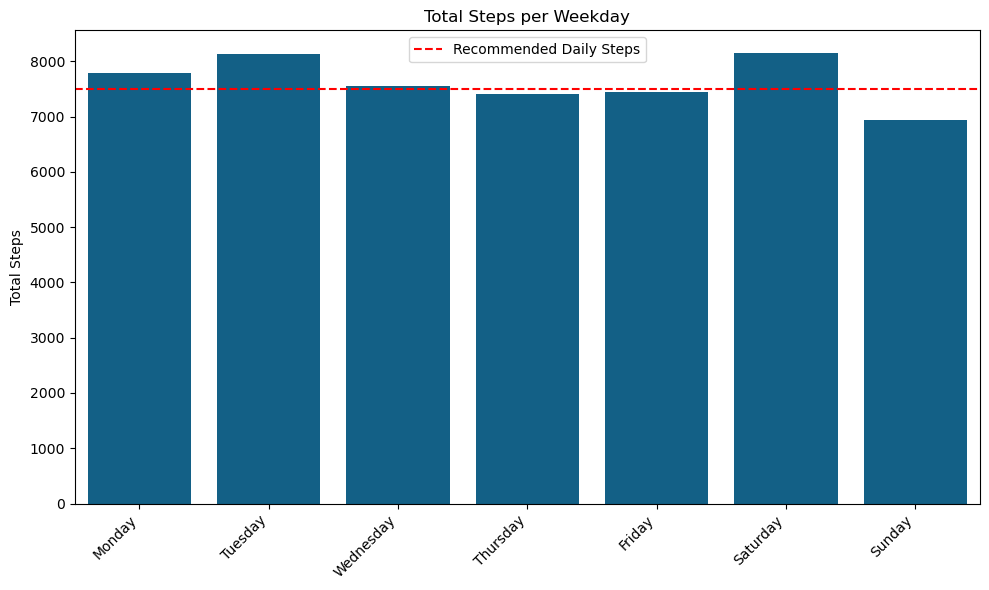

In [665]:
# Set the order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_steps['weekday'] = pd.Categorical(weekday_steps['weekday'], categories=weekday_order, ordered=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_steps, x='weekday', y='TotalSteps', color="#006699")

# Add horizontal line at y=7500
plt.axhline(y=7500, color='red', linestyle='--', label='Recommended Daily Steps')

# Set titles and labels
plt.title("Total Steps per Weekday")
plt.xlabel("")
plt.ylabel("Total Steps")
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Hourly steps throughout the day 

To enhance our analysis, we aim to identify the specific times during the day when users exhibit higher activity levels. To achieve this, we will utilize the hourly_steps data frame and extract the relevant information from the date_time column.

In [487]:
hourly_steps.head()

,Id,ActivityHour,StepTotal,date,time
0,1503960366,2016-04-12,373,2016-04-12,00:00:00
1,1503960366,2016-04-12,160,2016-04-12,01:00:00
2,1503960366,2016-04-12,151,2016-04-12,02:00:00
3,1503960366,2016-04-12,0,2016-04-12,03:00:00
4,1503960366,2016-04-12,0,2016-04-12,04:00:00


In [485]:
hourly_steps['ActivityHour'].dtype

dtype('O')

In [493]:
hourly_steps['ActivityHour'] = hourly_steps['ActivityHour'].astype(str) # converts to string

hourly_steps[['date', 'time']] = hourly_steps['ActivityHour'].str.split(' ', expand=True) # splits date and time in activityhour

hourly_steps['date'] = pd.to_datetime(hourly_steps['date']).dt.date #convert date to datetime

In [495]:
hourly_steps.head()

,Id,ActivityHour,StepTotal,date,time
0,1503960366,2016-04-12,373,2016-04-12,00:00:00
1,1503960366,2016-04-12,160,2016-04-12,01:00:00
2,1503960366,2016-04-12,151,2016-04-12,02:00:00
3,1503960366,2016-04-12,0,2016-04-12,03:00:00
4,1503960366,2016-04-12,0,2016-04-12,04:00:00


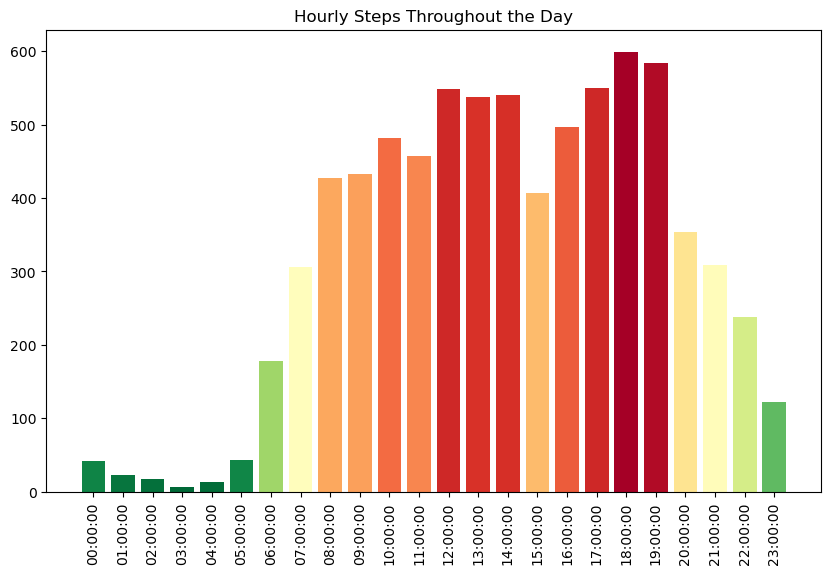

In [512]:
# Group by 'time' and calculate the average steps
average_steps = hourly_steps.groupby('time', as_index=False).agg(average_steps=('StepTotal', 'mean'))

# Create a bar plot
plt.figure(figsize=(10, 6))
# Here we use a continuous color map based on the average steps value
norm = plt.Normalize(average_steps['average_steps'].min(), average_steps['average_steps'].max())
colors = plt.cm.RdYlGn_r(norm(average_steps['average_steps']))

plt.bar(average_steps['time'], average_steps['average_steps'], color=colors)

# Add titles and labels
plt.title("Hourly Steps Throughout the Day")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The data shows that users are most active between 8 AM and 7 PM, with a noticeable increase in steps during lunchtime from 12 PM to 2 PM, as well as in the evening from 5 PM to 7 PM.

## Smart device usage

To understand user engagement and inform our marketing strategy, we’ll analyze how frequently users in our sample utilize their smart devices. This will help identify features that could encourage more consistent usage.

We’ll categorize users based on their daily device usage over a 31-day period:

    1. High use: users who use their device between 21 and 31 days.
    2. Moderate use: users who use their device between 10 and 20 days.
    3. Low use: users who use their device between 1 and 10 days.
First, we’ll create a new data frame that groups by Id, calculates the total days each user was active, and assigns a usage category based on the criteria above.

In [517]:
daily_use = (
    daily_activity_sleep.groupby('Id').size().reset_index(name='days_used')
)
daily_use['usage'] = np.select(
    [
        (daily_use['days_used'] >= 1) & (daily_use['days_used'] <= 10),
        (daily_use['days_used'] >= 11) & (daily_use['days_used'] <= 20),
        (daily_use['days_used'] >= 21) & (daily_use['days_used'] <= 31),
    ],
    ['low use', 'moderate use', 'high use']
)

daily_use.head()

,Id,days_used,usage
0,1503960366,25,high use
1,1644430081,4,low use
2,1844505072,3,low use
3,1927972279,5,low use
4,2026352035,28,high use


Next, we'll create a new dataframe to calculate the percentage distribution of each usage level, which will help in visualizing the data more clearly in a graph. Additionally, we'll ensure that the usage levels are ordered appropriately.

In [524]:
# Group by usage level and calculate the total count for each level
daily_use_percent = (
    daily_use.groupby('usage')
    .size()
    .reset_index(name='total')
)

# Calculate the overall total and then the percentage for each usage level
totals = daily_use_percent['total'].sum()
daily_use_percent['total_percent'] = daily_use_percent['total'] / totals

# Format percentage labels
daily_use_percent['labels'] = (daily_use_percent['total_percent'] * 100).round(2).astype(str) + '%'

# Set usage level order for plotting
daily_use_percent['usage'] = pd.Categorical(
    daily_use_percent['usage'],
    categories=["high use", "moderate use", "low use"],
    ordered=True
)

daily_use_percent.head()

,usage,total,total_percent,labels
0,high use,12,0.500,50.0%
1,low use,9,0.375,37.5%
2,moderate use,3,0.125,12.5%


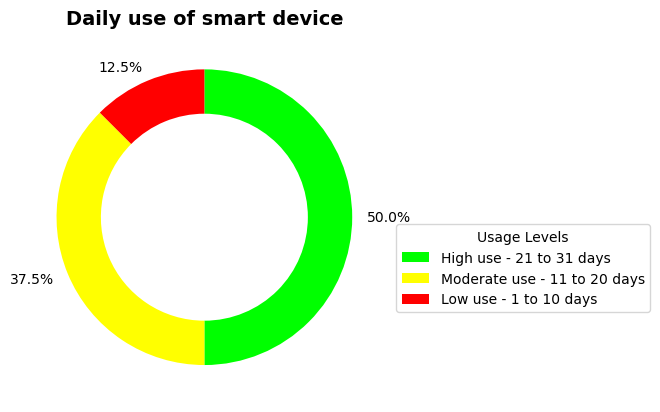

In [534]:
# Data for plotting
colors = ["#00FF00", "#FFFF00", "#FF0000"]
labels = ["High use - 21 to 31 days", "Moderate use - 11 to 20 days", "Low use - 1 to 10 days"]

# Plotting a pie chart
fig, ax = plt.subplots()
ax.pie(
    daily_use_percent['total_percent'],
    labels=daily_use_percent['labels'],
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.3)
)

# Adding a title and legend
plt.title("Daily use of smart device", fontsize=14, fontweight="bold")
plt.legend(labels, title="Usage Levels", loc="upper left", bbox_to_anchor=(1, 0.5))
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart

plt.show()

Our analysis reveals that:

    1. 50% of the users in our sample are frequent device users, engaging with their device for 21 to 31 days.
    2. 12% of users engage moderately, using their device between 11 to 20 days.
    3. 38% of users rarely use their device, interacting with it on 1 to 10 days.

Time spent on the app.

To gain more precise insights, we will analyze the average minutes users wear their device each day. We’ll do this by merging the daily_use data frame with daily_activity, allowing us to filter results based on daily usage categories as well.

In [540]:
daily_use_merged = daily_activity.merge(daily_use, on="Id")

daily_use_merged.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,days_used,usage
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,25,high use
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,25,high use
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,25,high use
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,25,high use
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,25,high use


We'll create a new dataframe that calculates the total minutes each user wore their device daily and classify each day into one of three usage categories:

    1. All day - Device was worn for the entire day.
    2. More than half day - Device was worn for over half of the day.
    3. Less than half day - Device was worn for less than half of the day.

In [553]:
# Create a new dataframe calculating total minutes worn and categorizing usage
minutes_worn = (daily_use_merged
                .assign(total_minutes_worn=lambda df: (df['VeryActiveMinutes'] +
                                                        df['FairlyActiveMinutes'] +
                                                        df['LightlyActiveMinutes'] +
                                                        df['SedentaryMinutes']),
                        percent_minutes_worn=lambda df: (df['total_minutes_worn'] / 1440) * 100)
                )

# Initialize 'worn' column with NaN
minutes_worn['worn'] = pd.NA

# Define conditions for each category
minutes_worn.loc[minutes_worn['percent_minutes_worn'] == 100, 'worn'] = 'All day'
minutes_worn.loc[(minutes_worn['percent_minutes_worn'] < 100) & 
                 (minutes_worn['percent_minutes_worn'] >= 50), 'worn'] = 'More than half day'
minutes_worn.loc[(minutes_worn['percent_minutes_worn'] < 50) & 
                 (minutes_worn['percent_minutes_worn'] > 0), 'worn'] = 'Less than half day'

# Ensure 'worn' is a categorical type with the specified categories
categories = ["Less than half day", "More than half day", "All day"]
minutes_worn['worn'] = pd.Categorical(minutes_worn['worn'], categories=categories)

# Display the first few rows of the dataframe
minutes_worn.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,days_used,usage,total_minutes_worn,percent_minutes_worn,worn
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,25,high use,1094,75.972222,More than half day
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,25,high use,1033,71.736111,More than half day
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,25,high use,1440,100.000000,All day
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,25,high use,998,69.305556,More than half day
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,25,high use,1040,72.222222,More than half day


To enhance the visualization of our results, we will create four distinct data frames. The first data frame will display the total number of users and calculate the percentage of minutes they wore their devices, categorized according to the three usage categories established earlier.

The remaining three data frames will filter the data based on these daily usage categories, allowing us to observe the differences in both daily device usage and the duration for which the device was worn.

In [612]:
# Calculate percentage of minutes worn for all users
minutes_worn_percent = (
    minutes_worn
    .groupby('worn', observed=False)
    .size()
    .reset_index(name='total')
)

# Calculate totals and percentages
total_minutes_worn = minutes_worn_percent['total'].sum()
minutes_worn_percent['total_percent'] = minutes_worn_percent['total'] / total_minutes_worn
minutes_worn_percent['labels'] = (minutes_worn_percent['total_percent'] * 100).astype(str) + '%'

# Calculate percentage of minutes worn for high usage
minutes_worn_highuse = (
    minutes_worn[minutes_worn['usage'] == 'high use']
    .groupby('worn', observed=False)
    .size()
    .reset_index(name='total')
)

total_highuse = minutes_worn_highuse['total'].sum()
minutes_worn_highuse['total_percent'] = minutes_worn_highuse['total'] / total_highuse
minutes_worn_highuse['labels'] = (minutes_worn_highuse['total_percent'] * 100).astype(str) + '%'

# Calculate percentage of minutes worn for moderate usage
minutes_worn_moduse = (
    minutes_worn[minutes_worn['usage'] == 'moderate use']
    .groupby('worn', observed=False)
    .size()
    .reset_index(name='total')
)

total_moduse = minutes_worn_moduse['total'].sum()
minutes_worn_moduse['total_percent'] = minutes_worn_moduse['total'] / total_moduse
minutes_worn_moduse['labels'] = (minutes_worn_moduse['total_percent'] * 100).astype(str) + '%'

# Calculate percentage of minutes worn for low usage
minutes_worn_lowuse = (
    minutes_worn[minutes_worn['usage'] == 'low use']
    .groupby('worn', observed=False)
    .size()
    .reset_index(name='total')
)

total_lowuse = minutes_worn_lowuse['total'].sum()
minutes_worn_lowuse['total_percent'] = minutes_worn_lowuse['total'] / total_lowuse
minutes_worn_lowuse['labels'] = (minutes_worn_lowuse['total_percent'] * 100).astype(str) + '%'

# Convert the 'worn' column to categorical with specific order
for df in [minutes_worn_highuse, minutes_worn_percent, minutes_worn_moduse, minutes_worn_lowuse]:
    df['worn'] = pd.Categorical(df['worn'], categories=["All day", "More than half day", "Less than half day"], ordered=True)

# Rounding the labels column
minutes_worn_percent['labels'] = (minutes_worn_percent['total_percent'] * 100).round(2).astype(str) + '%'
minutes_worn_highuse['labels'] = (minutes_worn_highuse['total_percent'] * 100).round(2).astype(str) + '%'
minutes_worn_moduse['labels'] = (minutes_worn_moduse['total_percent'] * 100).round(2).astype(str) + '%'
minutes_worn_lowuse['labels'] = (minutes_worn_lowuse['total_percent'] * 100).round(2).astype(str) + '%'


# Display the head of each DataFrame
display(minutes_worn_percent.head())
display(minutes_worn_highuse.head())
display(minutes_worn_moduse.head())
display(minutes_worn_lowuse.head())

,worn,total,total_percent,labels
0,Less than half day,25,0.035063,3.51%
1,More than half day,428,0.600281,60.03%
2,All day,260,0.364656,36.47%


,worn,total,total_percent,labels
0,Less than half day,16,0.043243,4.32%
1,More than half day,329,0.889189,88.92%
2,All day,25,0.067568,6.76%


,worn,total,total_percent,labels
0,Less than half day,3,0.040000,4.0%
1,More than half day,52,0.693333,69.33%
2,All day,20,0.266667,26.67%


,worn,total,total_percent,labels
0,Less than half day,6,0.022388,2.24%
1,More than half day,47,0.175373,17.54%
2,All day,215,0.802239,80.22%


Now that we have created the four data frames and organized the categories for the levels of device wear, we can visualize our results through the following plots. All the plots will be displayed together to enhance overall visualization.

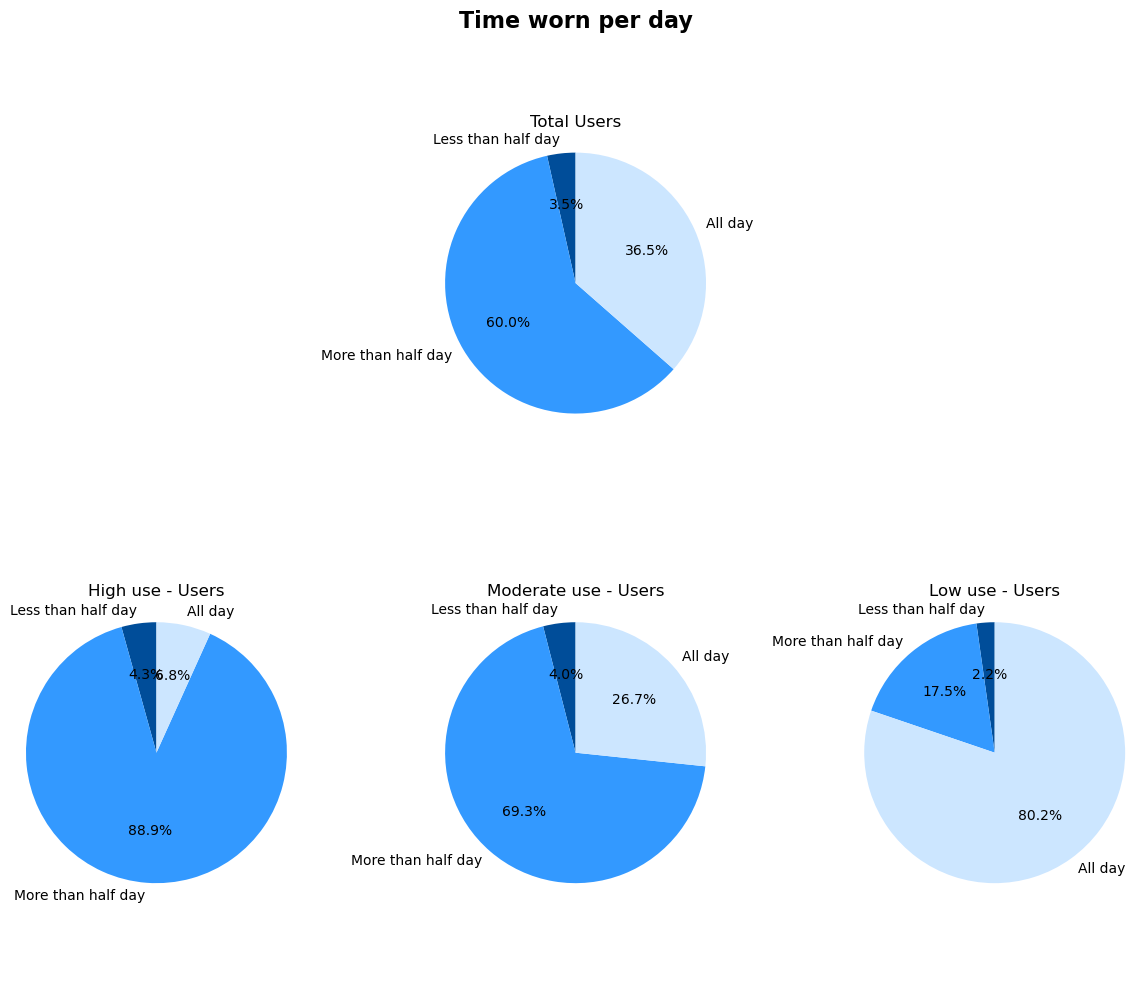

In [635]:
colors = ["#004d99", "#3399ff", "#cce6ff"]

# Create a figure for the subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

# Function to create a pie chart
def create_pie_chart(data, ax, title, subtitle):
    data['total_percent'] = data['total_percent'] * 100  # Convert to percentage
    wedges, texts, autotexts = ax.pie(data['total_percent'],
                                       labels=data['worn'],
                                       colors=colors,
                                       autopct='%1.1f%%',
                                       startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.text(0, 1.2, subtitle, ha='center', fontsize=12, fontweight='light')  # Adjusted position

    # Adjust label font sizes to prevent clashing
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(10)

# Top pie chart for Total Users
create_pie_chart(minutes_worn_percent, axs[0, 1], "Time worn per day", "Total Users")

# High use users
create_pie_chart(minutes_worn_highuse, axs[1, 0], "", "High use - Users")

# Moderate use users
create_pie_chart(minutes_worn_moduse, axs[1, 1], "", "Moderate use - Users")

# Low use users
create_pie_chart(minutes_worn_lowuse, axs[1, 2], "", "Low use - Users")

# Hide unused subplots
for ax in axs.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout to create space and arrange the triangle shape
fig.subplots_adjust(hspace=1, wspace=0.8)  # Increased vertical space for better separation
axs[0, 0].axis('off')  # Hide the top left corner

plt.tight_layout()
plt.show()

Based on our plots, we can observe that 36% of the total users wear their devices all day, 60% wear them for more than half the day, and only 4% wear them for less than half the day.

When we filter the total number of users by the number of days they have used their devices and analyze how long they wore the devices each day, we find the following insights:

    1. High use: Users who wear their devices between 21 and 31 days. Among them, only 6.8% wear their devices all day, while a significant 88.9% wear them for more than half the day but not all day.

    2. Moderate use: Users who wear their devices between 10 and 20 days tend to wear them the least on a daily basis.

    3. Low use: Interestingly, users in this category, who wear their devices for only 1 to 10 days, tend to wear them for a longer duration on the days they do use them.

This data highlights the varied patterns of device usage across different user groups, with low users showing a tendency to wear their devices longer on the days they engage with them compared to moderate and high users.








# Act Phase

## Recommendation

    1. Daily Notifications on Steps and App Posts: We classified users into four categories and discovered that, on average, users walk over 7,500 steps each day, except for Thursdays, Fridays, and Sundays. To motivate users to meet the CDC's daily recommendation of 8,000 steps, we can introduce notifications to remind them if they fall short of this goal. Furthermore, we can develop informative posts within our app that emphasize the health benefits of reaching this target. The CDC indicates that higher step counts are linked to reduced mortality rates.

    2. Reward System: Recognizing that not everyone is motivated by notifications, we could introduce a gamified experience within our app for a limited time. This game would involve users reaching different levels based on the number of steps they walk each day. To advance to the next level, users would need to maintain a consistent activity level over a set period, such as a month. For each level achieved, participants would earn stars that can be redeemed for merchandise or discounts on other Bellabeat products.ts.

In our analysis, we not only examined trends in daily user habits but also discovered that only 50% of users engage with their devices daily. Additionally, just 36% of users wear their devices throughout the entire day. To enhance user engagement, we can further promote the features of Bellabeat's products:

    1. Water-Resistant: Our devices are designed to withstand moisture, making them suitable for any environment.
    2. Long-Lasting Batteries: Enjoy extended usage without the hassle of frequent charging.
    3. Fashionable and Elegant Designs: Our products seamlessly blend style and functionality, allowing you to wear them on any occasion.
With these features, users can confidently incorporate our products into their daily lives without worrying about battery life or style.